OBJECTIVE: 

This notebook explores dataset from "Cardio Good Fitness" company that has following characteristics:

1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

After analysis we should be able to answer following questions: (Answer at the bottom of this notebook)

1. Who buys each treadmill model? Describe the customer characteristics?
2. Which treadmill model has sold more?
3. Which model is popular among high income customer group (\$85,000 +)?
4. Who are highly health concious customers (Fitness score is more than 4.5)?
5. Which model is popular among highly health concious customers?
6. Which model is popular among educated customers  (18+ years of education)?
7. Which model is popular among cost concious customers (Customers who earn between \$30,000 and \$40,0000)?
8. Who buys treadmil more? Men or Women?
9. What is the final recommendation for "Cardio Good Fitness" that can help company targeting new customers?

In [124]:
# Importing Python libbraries to perform analysis and visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [125]:
# Load cardio good fitness dataset

cgfdata = pd.read_csv('CardioGoodFitness.csv')

In [126]:
# Dimension of the data set

cgfdata.shape

(180, 9)

In [127]:
# Return the first 10 rows.

cgfdata.head (10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [128]:
# Return the last 10 rows

cgfdata.tail (10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [129]:
# Prints columns labels of the dataframe

cgfdata.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [130]:
# Print data types and count of the dataframe columns

print(cgfdata.dtypes)
print(cgfdata.dtypes.value_counts())

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object
int64     6
object    3
dtype: int64


In [157]:
# Cast product, gender and marital status as category.

cgfdata["Product"] = cgfdata["Product"].astype("category")
cgfdata["Gender"] = cgfdata["Gender"].astype("category")
cgfdata["MaritalStatus"] = cgfdata["MaritalStatus"].astype("category")
print(cgfdata.dtypes)

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


In [158]:
# Check for data quality. 

cgfdata.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [159]:
# DATA ANALYSIS:


# Generate descriptive statistics for column age using groupby function

cgfdata.groupby('Product')['Age'].describe().T

Product,TM195,TM498,TM798
count,80.000000,60.000000,40.000000
mean,28.550000,28.900000,29.100000
std,7.221452,6.645248,6.971738
min,18.000000,19.000000,22.000000
25%,23.000000,24.000000,24.750000
50%,26.000000,26.000000,27.000000
75%,33.000000,33.250000,30.250000
max,50.000000,48.000000,48.000000


In [160]:
# Generate descriptive statistics for column education using groupby function

cgfdata.groupby('Product')['Education'].describe().T

Product,TM195,TM498,TM798
count,80.000000,60.000000,40.000000
mean,15.037500,15.116667,17.325000
std,1.216383,1.222552,1.639066
min,12.000000,12.000000,14.000000
25%,14.000000,14.000000,16.000000
50%,16.000000,16.000000,18.000000
75%,16.000000,16.000000,18.000000
max,18.000000,18.000000,21.000000


In [162]:
# Generate descriptive statistics for column fitness using groupby function

cgfdata.groupby('Product')['Fitness'].describe().T

Product,TM195,TM498,TM798
count,80.00000,60.00000,40.000000
mean,2.96250,2.90000,4.625000
std,0.66454,0.62977,0.667467
min,1.00000,1.00000,3.000000
25%,3.00000,3.00000,4.000000
50%,3.00000,3.00000,5.000000
75%,3.00000,3.00000,5.000000
max,5.00000,4.00000,5.000000


In [163]:
# Generate descriptive statistics for column income using groupby function

cgfdata.groupby('Product')['Income'].describe().T


Product,TM195,TM498,TM798
count,80.00000,60.000000,40.00000
mean,46418.02500,48973.650000,75441.57500
std,9075.78319,8653.989388,18505.83672
min,29562.00000,31836.000000,48556.00000
25%,38658.00000,44911.500000,58204.75000
50%,46617.00000,49459.500000,76568.50000
75%,53439.00000,53439.000000,90886.00000
max,68220.00000,67083.000000,104581.00000


In [165]:
# Generate descriptive statistics for marital status category for each product using groupby function

cgfdata.groupby('Product')['MaritalStatus'].describe().T

Product,TM195,TM498,TM798
count,80,60,40
unique,2,2,2
top,Partnered,Partnered,Partnered
freq,48,36,23


In [166]:
# Generate descriptive statistics for gender category for each product using groupby function

cgfdata.groupby('Product')['Gender'].describe().T

Product,TM195,TM498,TM798
count,80,60,40
unique,2,2,2
top,Female,Male,Male
freq,40,31,33


In [167]:
# Generate descriptive statistics for product category for each gender using crosstab function

pd.crosstab(cgfdata['Gender'], cgfdata['Product'])

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


In [168]:
# Compute summary (count) statistics among MaritalStatus, Product and Gender categories using crosstab function

pd.crosstab(cgfdata['MaritalStatus'], [cgfdata['Product'],cgfdata['Gender']], margins=True, margins_name="Total")

Product        TM195       TM498       TM798      Total
Gender        Female Male Female Male Female Male      
MaritalStatus                                          
Partnered         27   21     15   21      4   19   107
Single            13   19     14   10      3   14    73
Total             40   40     29   31      7   33   180

In [169]:
# Compute summary (average) statistics among MaritalStatus, Product and Gender categories using crosstab function

pd.crosstab(cgfdata.MaritalStatus, [cgfdata.Product,cgfdata.Gender], values=cgfdata.Age, aggfunc='mean').round(0)

Product        TM195        TM498        TM798      
Gender        Female  Male Female  Male Female  Male
MaritalStatus                                       
Partnered       28.0  31.0   30.0  30.0   29.0  30.0
Single          29.0  26.0   28.0  25.0   24.0  29.0

In [170]:
# Compute summary (count) statistics among MaritalStatus, and Gender categories using crosstab function

pd.crosstab(cgfdata['MaritalStatus'], cgfdata['Gender'])

Gender,Female,Male
MaritalStatus,,
Partnered,46,61
Single,30,43


In [171]:
# Compute summary statistics among MaritalStatus, and Gender categories using pivot functions

pd.pivot_table(cgfdata,index=["Product","MaritalStatus","Gender"],aggfunc=[np.mean, np.median, len]).stack(0).round(1)

Age  Education  Fitness   Income  Miles  \
Product MaritalStatus Gender                                                    
TM195   Partnered     Female len     27.0       27.0     27.0     27.0   27.0   
                             mean    28.3       14.9      2.9  46153.8   74.9   
                             median  27.0       14.0      3.0  46617.0   66.0   
                      Male   len     21.0       21.0     21.0     21.0   21.0   
                             mean    31.4       15.4      2.9  50028.0   80.2   
                             median  30.0       16.0      3.0  51165.0   75.0   
        Single        Female len     13.0       13.0     13.0     13.0   13.0   
                             mean    28.7       15.5      2.9  45742.4   78.8   
                             median  26.0       16.0      3.0  45480.0   75.0   
                      Male   len     19.0       19.0     19.0     19.0   19.0   
                             mean    25.6       14.5      3.3  43265.8   99.5   
                             median  25.0       14.0      3.0  43206.0   94.0   
TM498   Partnered     Female len     15.0       15.0     15.0     15.0   15.0   
                             mean    30.0       15.2      2.9  49724.8   94.0   
                             median  31.0       16.0      3.0  50028.0   85.0   
                      Male   len     21.0       21.0     21.0     21.0   21.0   
                             mean    30.4       15.3      2.9  49378.3   87.2   
                             median  31.0       16.0      3.0  52302.0   95.0   
        Single        Female len     14.0       14.0     14.0     14.0   14.0   
                             mean    28.1       15.2      2.8  48920.4   80.2   
                             median  25.5       15.0      3.0  47185.5   79.5   
                      Male   len     10.0       10.0     10.0     10.0   10.0   
                             mean    25.2       14.5      3.0  47071.8   91.1   
                             median  25.0       14.0      3.0  47185.5   95.0   
TM798   Partnered     Female len      4.0        4.0      4.0      4.0    4.0   
                             mean    29.0       17.5      5.0  84972.2  215.0   
                             median  29.0       18.0      5.0  91508.5  200.0   
                      Male   len     19.0       19.0     19.0     19.0   19.0   
                             mean    30.0       17.4      4.6  81431.4  176.3   
                             median  27.0       18.0      5.0  83416.0  160.0   
        Single        Female len      3.0        3.0      3.0      3.0    3.0   
                             mean    24.3       18.3      4.0  58516.0  133.3   
                             median  24.0       18.0      4.0  53536.0  100.0   
                      Male   len     14.0       14.0     14.0     14.0   14.0   
                             mean    28.9       16.9      4.6  68216.4  147.6   
                             median  25.5       16.0      5.0  59761.0  150.0   

                                     Usage  
Product MaritalStatus Gender                
TM195   Partnered     Female len      27.0  
                             mean      2.9  
                             median    3.0  
                      Male   len      21.0  
                             mean      3.3  
                             median    3.0  
        Single        Female len      13.0  
                             mean      3.0  
                             median    3.0  
                      Male   len      19.0  
                             mean      3.3  
                             median    3.0  
TM498   Partnered     Female len      15.0  
                             mean      3.3  
                             median    3.0  
                      Male   len      21.0  
                             mean      2.9  
                             median    3.0  
        Single        Female len      14.0  
              

In [183]:
# Compute summary statistics among product, and Gender categories using pivot functions

pd.pivot_table(cgfdata,index=["Gender","Product"]).round(1)

Age  Education  Fitness   Income  Miles  Usage
Gender Product                                                 
Female TM195    28.4       15.1      2.9  46020.1   76.2    2.9
       TM498    29.1       15.2      2.9  49336.4   87.3    3.1
       TM798    27.0       17.9      4.6  73633.9  180.0    5.0
Male   TM195    28.6       15.0      3.0  46816.0   89.4    3.3
       TM498    28.7       15.0      2.9  48634.3   88.5    3.0
       TM798    29.5       17.2      4.6  75825.0  164.1    4.7

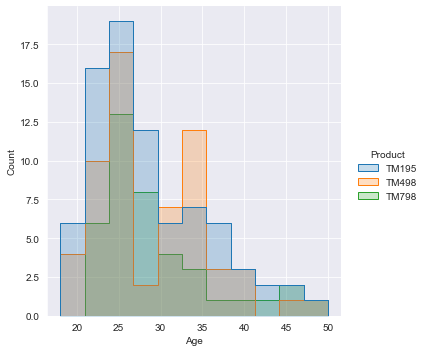

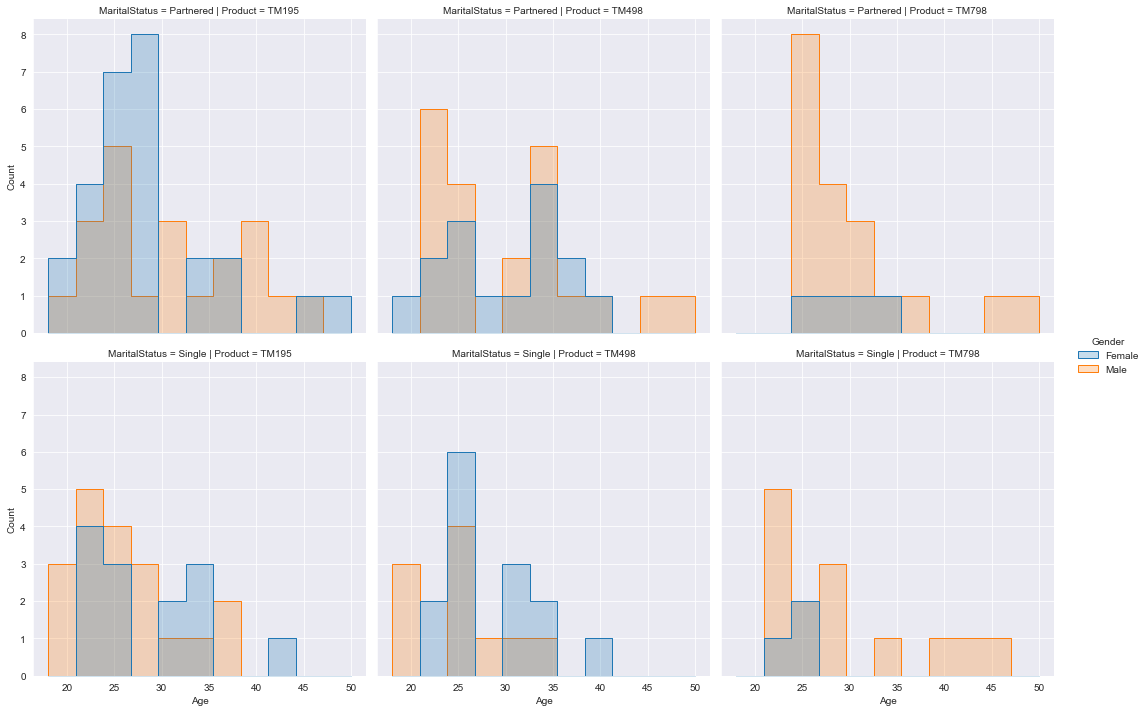

In [173]:
# VISUALIZATION:


# Distribution plot to visualize age charateristics of the sample dataset.

sns.displot(data=cgfdata, x="Age", hue="Product", element="step")
plt.show()
sns.displot(data=cgfdata, x="Age", hue="Gender", element="step", col='Product', row='MaritalStatus')
plt.show()

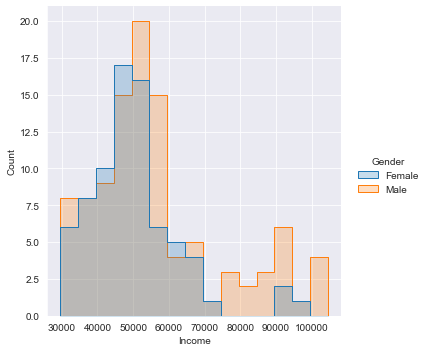

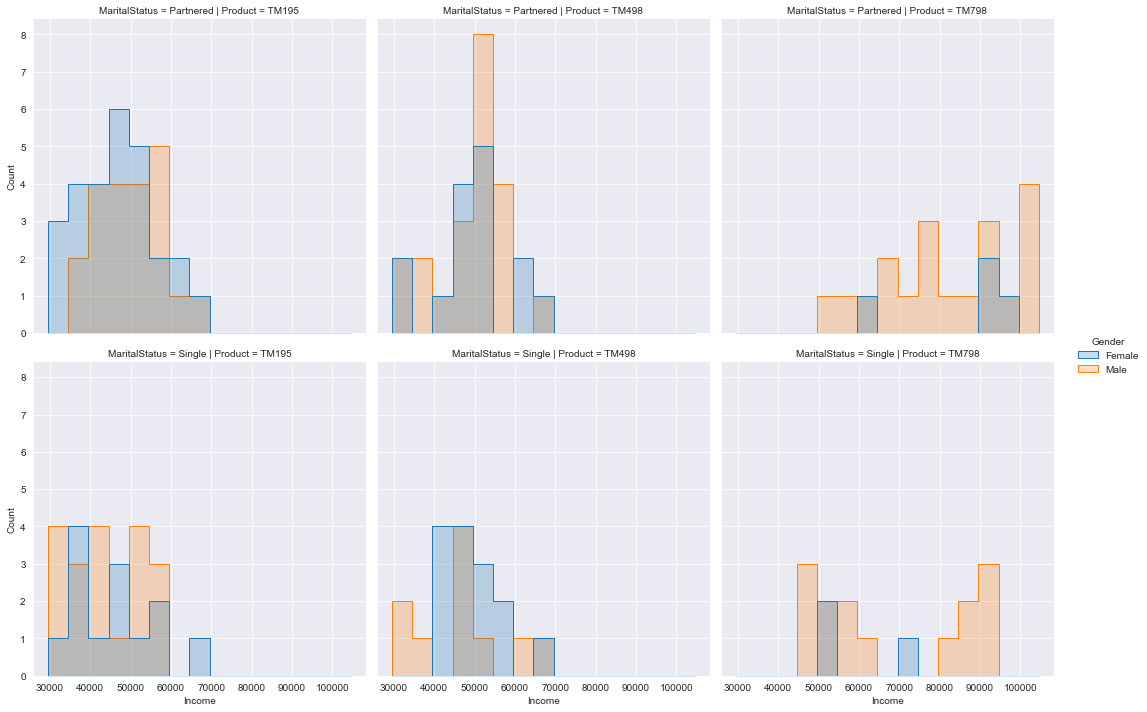

In [174]:
# Distribution plot to visualize income charateristics of the sample dataset.

sns.displot(data=cgfdata, x="Income", hue="Gender", element="step")
plt.show()
sns.displot(data=cgfdata, x="Income", hue="Gender", element="step", col='Product', row='MaritalStatus')
plt.show()

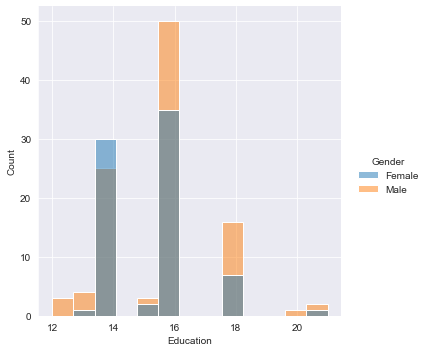

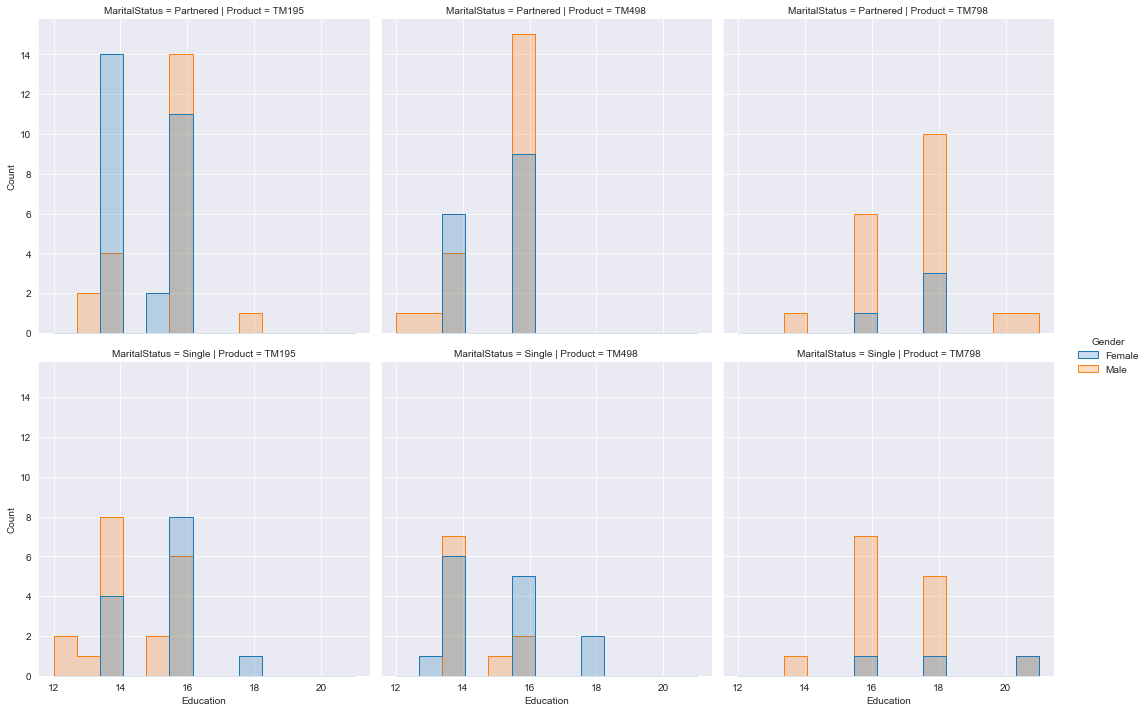

In [175]:
# Distribution plot to visualize education charateristics of the sample dataset.

sns.displot(data=cgfdata, x="Education", hue="Gender")
plt.show()
sns.displot(data=cgfdata, x="Education", hue="Gender", element="step", col='Product', row='MaritalStatus')
plt.show()

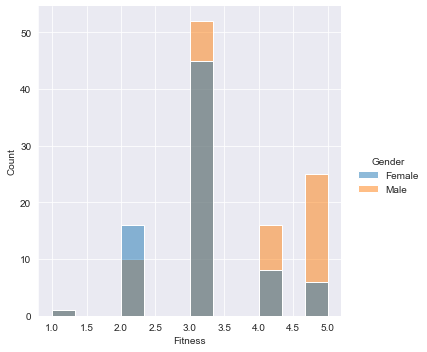

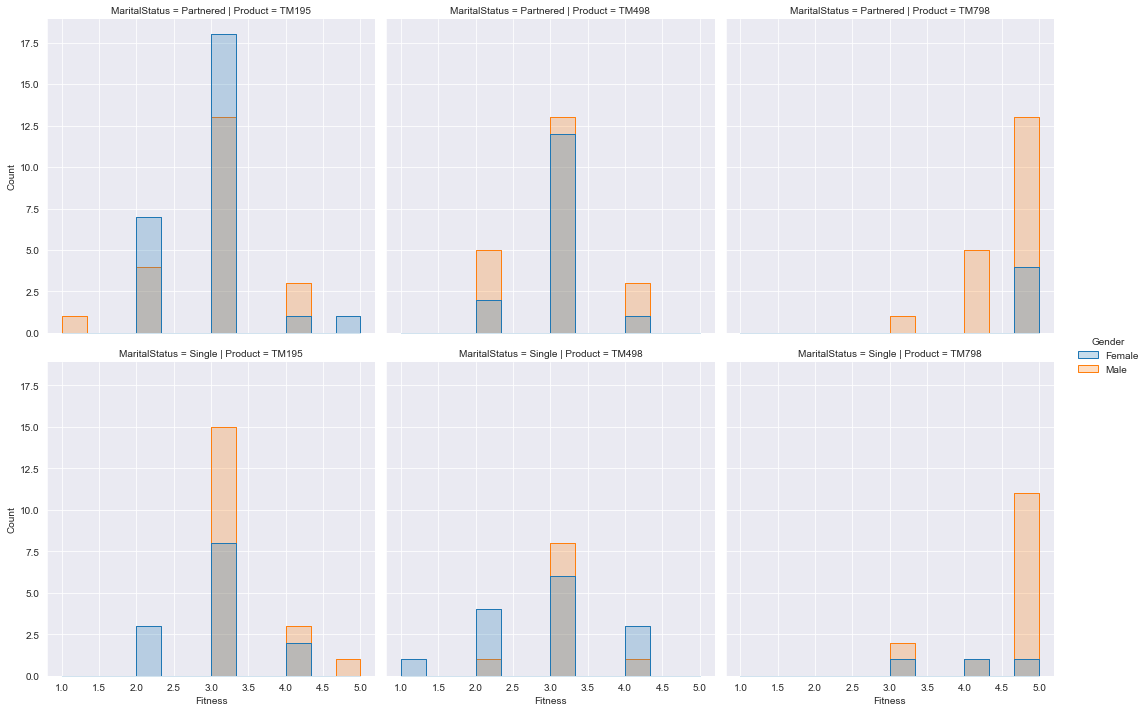

In [176]:
# Distribution plot to visualize fitness charateristics of the sample dataset.

sns.displot(data=cgfdata, x="Fitness", hue="Gender")
plt.show()
sns.displot(data=cgfdata, x="Fitness", hue="Gender", element="step", col='Product', row='MaritalStatus')
plt.show()

<AxesSubplot:xlabel='Product', ylabel='count'>

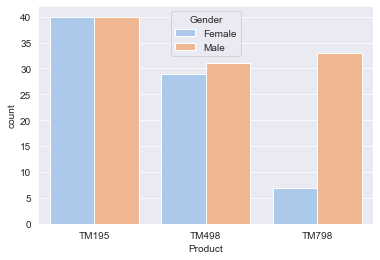

In [177]:
# Count plot to visualize number of product sold based on gender.

sns.countplot(data=cgfdata, x='Product', hue = 'Gender', palette='pastel')

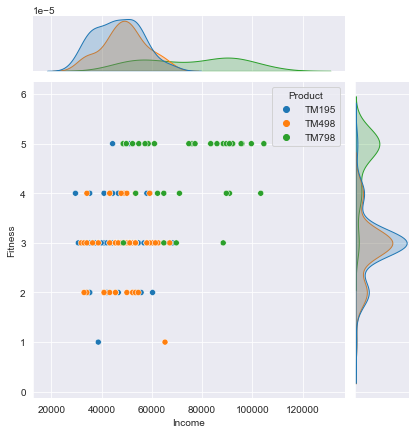

In [178]:
# Joint plot to visualize relation between income and fitness charateristics of the sample dataset.

sns.jointplot(data=cgfdata, x="Income", y="Fitness", hue="Product")

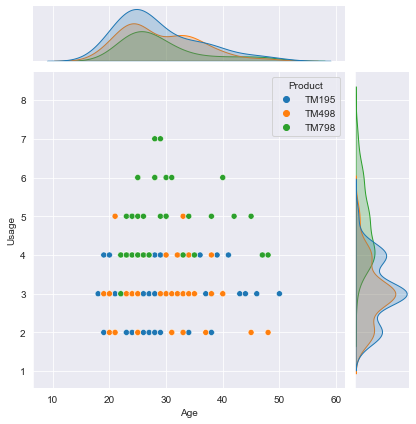

In [179]:
# Joint plot to visualize relation between age and usage charateristics of the sample dataset.

sns.jointplot(data=cgfdata, x="Age", y="Usage", hue="Product")

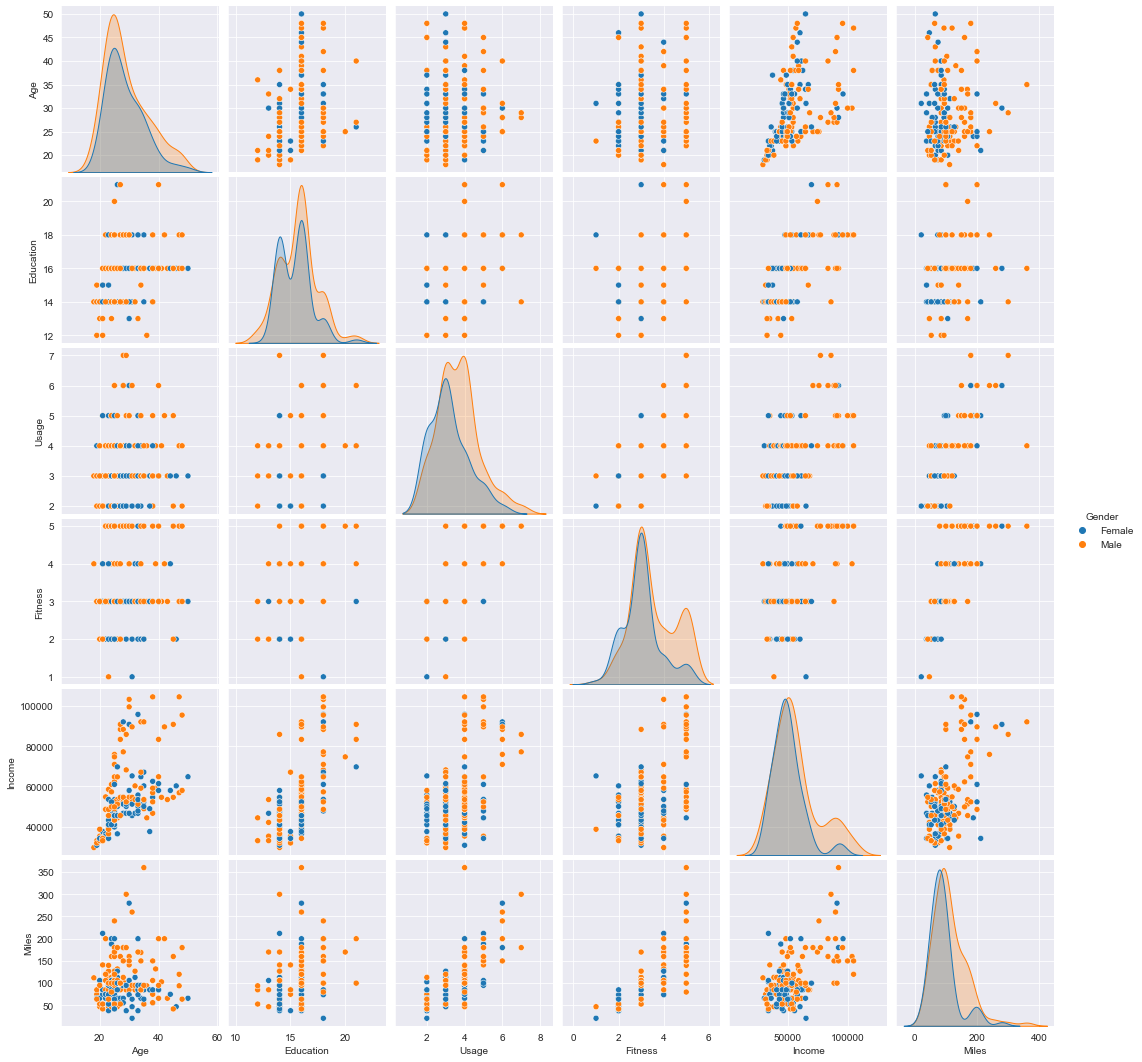

In [180]:
# Pair plot to visualize relation between all charateristics of the sample dataset.

sns.pairplot(cgfdata, hue='Gender')
plt.show()

In [181]:
# Creating a 2-D Matrix with correlation points.

correlation = cgfdata.corr() 
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


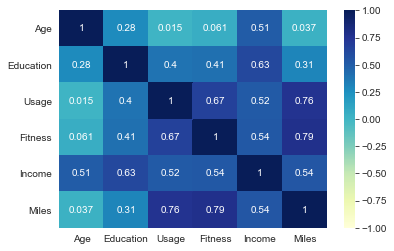

In [182]:
# Visualizing correlation between characteristic of the sample dataset.

sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.show()

INSIGHTS FROM ANALYSIS:

1. Who buys each treadmill model? Describe the customer characteristics?

    TM195 - Majority of the customers who buy this model are between ages 22 & 28 years especially women, who are in a relationship and single men. Income of these customers are between \$30,000 & \$60,000 and they have anywhere between 14 to 16 years of education.

    TM498 - Majority of the customers who buy this model are between age 22 & 26 years and 32 & 35 years specifically men, who are in a relationship and single women. Income of these customers are between \$40,000 & \$60,000 and they have anywhere between 14 to 16 years of education.

    TM798 - Majority of the customers who buy this model are between age 22 & 30 years men. Income of these customers are between \$60,000 & \$100,000 and they have anywhere between 16 to 18 years of education.

2. Which treadmill model has sold more?

    TM195 is the popular model. (80 of them out of 180)

3. Which model is popular among high income customer group (\$80,000+)?

    TM798 is very popular among high income group.

4. Who are highly health conscious customers (Fitness score is more than 4.5)?

    Both men and women who earn more than $80,000 are health conscious customers.

5. Which model is popular among highly health conscious customers?

    TM798 is very popular among health conscious customers.

6. Which model is popular among educated customers (18+ years of education)?

    TM798 is very popular among educated customer.

7. Which model is popular among cost conscious customers (Customers who earn between \$30,000 and \$40,0000)?

    TM195 is popular among low-income customers.

8. Who buys treadmill more? Men or Women?

    Men buy more treadmill than women. (102 men vs 78 women)

9. What is the final recommendation for "Cardio Good Fitness" that can help company targeting new customers?

    Based on the data sample and analysis, following are the key recommendation.

    a. Focus on high income men (\$80,000+) to sell more TM798 model.
    
    b. Focus on single women who are between the age 22 - 26 years and 32 - 35 years to sell more TM498 model.
    
    c. To sell more TM195, a popular model, focus on low-income (\$30,000 - \$40,0000) men and women
